In [214]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
df = pd.read_csv('Tesla.csv')

In [216]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [217]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [218]:
df['Date']=pd.to_datetime(df['Date'])

In [219]:
df.set_index('Date',inplace=True)

In [220]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [221]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1692.0,1.324416e+02,9.430992e+01,16.139999,3.000000e+01,1.563350e+02,2.205575e+02,2.876700e+02
High,1692.0,1.347697e+02,9.569491e+01,16.629999,3.065000e+01,1.623700e+02,2.241000e+02,2.914200e+02
Low,1692.0,1.299962e+02,9.285523e+01,14.980000,2.921500e+01,1.531500e+02,2.171200e+02,2.804000e+02
Close,1692.0,1.324287e+02,9.431319e+01,15.800000,2.988500e+01,1.581600e+02,2.200225e+02,2.860400e+02
Volume,1692.0,4.270741e+06,4.295971e+06,118500.000000,1.194350e+06,3.180700e+06,5.662100e+06,3.716390e+07
Adj Close,1692.0,1.324287e+02,9.431319e+01,15.800000,2.988500e+01,1.581600e+02,2.200225e+02,2.860400e+02


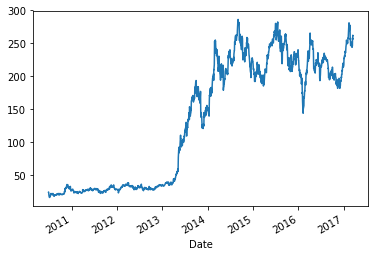

In [222]:
df['Close'].plot()

In [223]:
timeseries= df['Close']

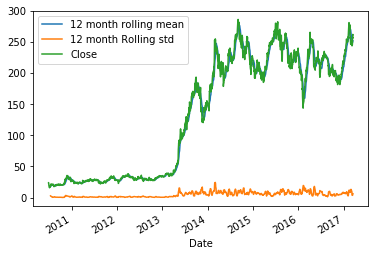

In [224]:
timeseries.rolling(12).mean().plot(label='12 month rolling mean')
timeseries.rolling(12).std().plot(label='12 month Rolling std')
timeseries.plot()
plt.legend()

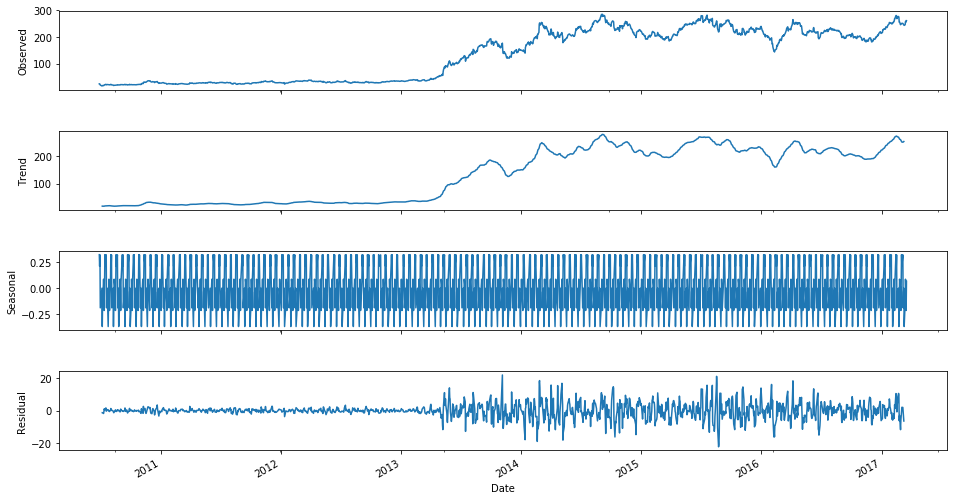

In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion=seasonal_decompose(df['Close'],freq=12)
fig=plt.figure()
fig=decompostion.plot()
fig.set_size_inches(15, 8)

In [226]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [227]:
from statsmodels.tsa.stattools import adfuller



In [228]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Dickyfuller Test:')
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
 
    for value , label in zip(result,labels):
        print(label+':'+str(value))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")         

In [229]:
adf_check(df['Close'].dropna())

Augmented Dickyfuller Test:
ADF Test Statistic:-0.813732969318
p-value:0.815054790864
#Lags Used:0
Number of Observations Used:1691
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [230]:
df['Close first diff']=timeseries-timeseries.shift(1)

In [231]:
adf_check(df['Close first diff'].dropna())

Augmented Dickyfuller Test:
ADF Test Statistic:-39.8482802472
p-value:0.0
#Lags Used:0
Number of Observations Used:1690
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


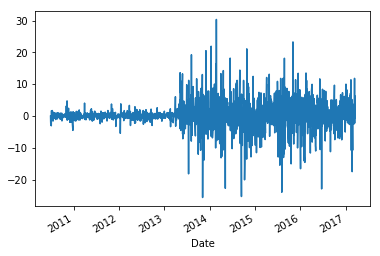

In [232]:
df['Close first diff'].plot()

In [233]:
df['Close second diff']=df['Close first diff']-df['Close first diff'].shift(1)

In [234]:
adf_check(df['Close second diff'].dropna())

Augmented Dickyfuller Test:
ADF Test Statistic:-14.4480643693
p-value:7.17439293602e-27
#Lags Used:23
Number of Observations Used:1666
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [235]:
df['Seasonal diff']=timeseries-timeseries.shift(6)

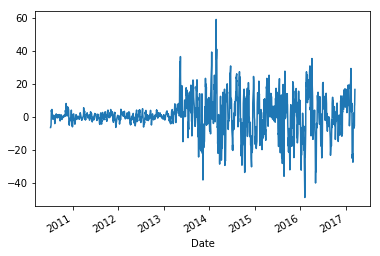

In [236]:
df['Seasonal diff'].plot()

In [237]:
adf_check(df['Seasonal diff'].dropna())

Augmented Dickyfuller Test:
ADF Test Statistic:-7.38587267136
p-value:8.24005368461e-11
#Lags Used:25
Number of Observations Used:1660
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [238]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

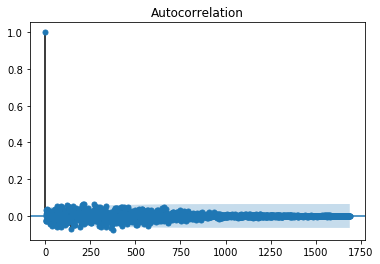

In [239]:
fig1=plot_acf(df['Close first diff'].dropna())

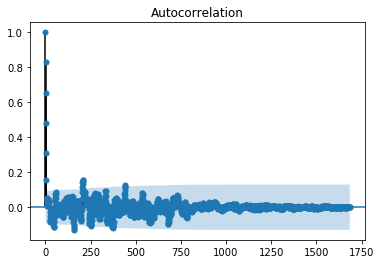

In [240]:
fig2= plot_acf(df['Seasonal diff'].dropna())

In [ ]:
fig1a=plot_pacf(df['Seasonal diff'].dropna())

In [ ]:
import statsmodels.api as sm

In [155]:
from statsmodels.tsa.arima_model import ARIMA

In [213]:
model = sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(1,1,1,12))
results =model.fit()
print(results.summary())

c:\users\91750\anaconda\envs\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1692
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -4898.761
Date:                            Wed, 26 Aug 2020   AIC                           9803.522
Time:                                    08:30:48   BIC                           9819.799
Sample:                                         0   HQIC                          9809.551
                                           - 1692                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0080      0.017      0.468      0.640      -0.026       0.042
ma.S.L12      -0.9998      0.531   

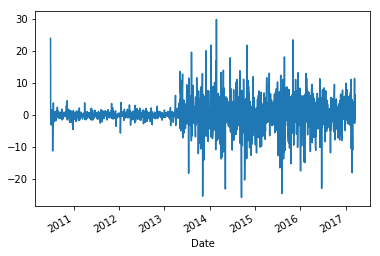

In [170]:
results.resid.plot()

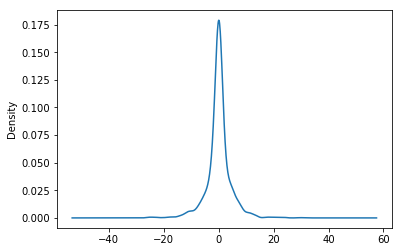

In [171]:
results.resid.plot(kind='kde')

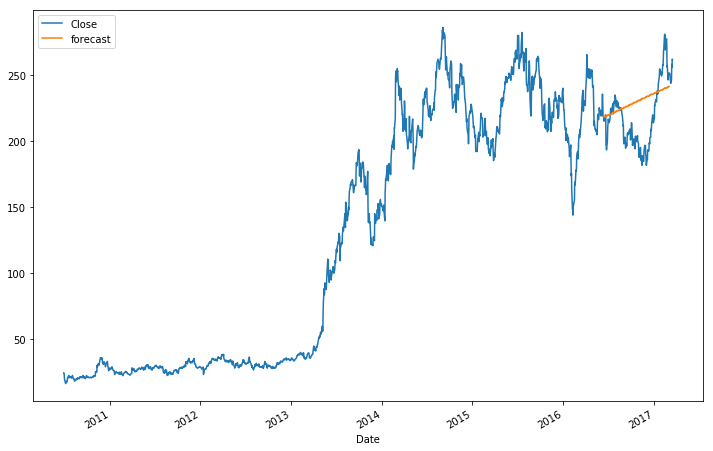

In [172]:
df['forecast'] = results.predict(start = 1500, end= 1681, dynamic= True)  
df[['Close','forecast']].plot(figsize=(12,8))

In [201]:
from pandas.tseries.offsets import DateOffset

In [202]:
future_dates = [df.index[-1] + DateOffset(days=x) for x in range(1,365) ]

In [203]:
future_dates

[Timestamp('2017-03-18 00:00:00'),
 Timestamp('2017-03-19 00:00:00'),
 Timestamp('2017-03-20 00:00:00'),
 Timestamp('2017-03-21 00:00:00'),
 Timestamp('2017-03-22 00:00:00'),
 Timestamp('2017-03-23 00:00:00'),
 Timestamp('2017-03-24 00:00:00'),
 Timestamp('2017-03-25 00:00:00'),
 Timestamp('2017-03-26 00:00:00'),
 Timestamp('2017-03-27 00:00:00'),
 Timestamp('2017-03-28 00:00:00'),
 Timestamp('2017-03-29 00:00:00'),
 Timestamp('2017-03-30 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-04-02 00:00:00'),
 Timestamp('2017-04-03 00:00:00'),
 Timestamp('2017-04-04 00:00:00'),
 Timestamp('2017-04-05 00:00:00'),
 Timestamp('2017-04-06 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-04-08 00:00:00'),
 Timestamp('2017-04-09 00:00:00'),
 Timestamp('2017-04-10 00:00:00'),
 Timestamp('2017-04-11 00:00:00'),
 Timestamp('2017-04-12 00:00:00'),
 Timestamp('2017-04-13 00:00:00'),
 Timestamp('2017-04-14 00:00:00'),
 Timestamp('2017-04-

In [204]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [205]:
future_df = pd.concat([df,future_dates_df])

In [206]:
future_df.head()

,Open,High,Low,Close,Volume,Adj Close,Close first diff,Close second diff,Seasonal diff,forecast
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-0.059999,NaN,NaN,NaN
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-1.870001,-1.810002,NaN,NaN
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-2.759998,-0.889997,NaN,NaN
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-3.090000,-0.330002,NaN,NaN


In [207]:
future_df.tail()

,Open,High,Low,Close,Volume,Adj Close,Close first diff,Close second diff,Seasonal diff,forecast
2018-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\users\91750\anaconda\envs\pyfinance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


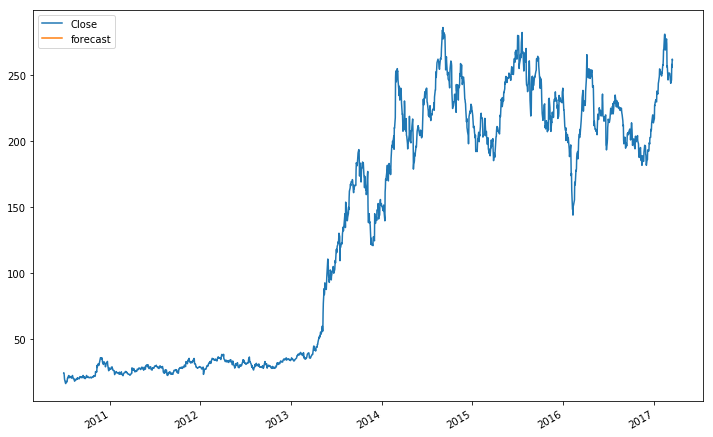

In [212]:
future_df['forecast'] = results.predict(start = 1681, end = 2040, dynamic= True)  
future_df[['Close', 'forecast']].plot(figsize=(12, 8)) 